# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#chaking the api_key
weather_api_key

'b94a3cd21aad294df7433f9e4dfc7bb7'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build thje url (test)
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "clyde river"
cURL = url + "appid=" + weather_api_key + "&q=" + city


In [5]:
# request ans convert it in jason 
response = requests.get(cURL).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 70.47, 'lon': -68.59},
 'dt': 1600336909,
 'id': 5924351,
 'main': {'feels_like': 269.91,
          'humidity': 90,
          'pressure': 1004,
          'temp': 273.15,
          'temp_max': 273.15,
          'temp_min': 273.15},
 'name': 'Clyde River',
 'sys': {'country': 'CA',
         'id': 776,
         'sunrise': 1600336565,
         'sunset': 1600383687,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 240, 'speed': 1.5}}


In [6]:
# make an empty list

lat = []
lon = []   
MTemp = []   
humidity = [] 
cloudinnes = []   
windspeed = []
name = []
country = [] 
date = []
# make the loop
for city in cities:
    #try and except
    try:
        # create the url for the loop and past the response to json
        cURL = url + "appid=" + weather_api_key + "&q=" + city
        response = requests.get(cURL).json()
        
        #append the data into the emty list 
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        MTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudinnes.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        name.append(response['name'])
        
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #close the try and except, 
        #print to know the loop status
        print(f"Processing Record " + city)    
    except KeyError:
        print("City not found. Skipping...")
        pass
    

Processing Record dankaur
Processing Record half moon bay
City not found. Skipping...
City not found. Skipping...
Processing Record talakan
Processing Record sakakah
Processing Record thompson
Processing Record rikitea
Processing Record tomatlan
Processing Record tuatapere
Processing Record ahipara
Processing Record hermanus
Processing Record vardo
Processing Record georgetown
Processing Record bluff
Processing Record niono
City not found. Skipping...
Processing Record mataura
Processing Record seinajoki
Processing Record san patricio
Processing Record bredasdorp
Processing Record qaanaaq
Processing Record hit
City not found. Skipping...
Processing Record castro
Processing Record severo-kurilsk
Processing Record busselton
Processing Record kendari
Processing Record hilo
Processing Record beloha
Processing Record vokhtoga
City not found. Skipping...
Processing Record kruisfontein
Processing Record jamestown
Processing Record cape town
City not found. Skipping...
Processing Record airai


Processing Record biak
Processing Record cabra
Processing Record gornopravdinsk
Processing Record gimli
Processing Record mount isa
Processing Record moyale
Processing Record matagami
Processing Record antofagasta
Processing Record bandarbeyla
Processing Record bubaque
Processing Record maniitsoq
Processing Record conceicao do araguaia
City not found. Skipping...
Processing Record antsohihy
Processing Record aykhal
Processing Record codrington
Processing Record parlakimidi
Processing Record cockburn town
Processing Record tura
Processing Record oriximina
Processing Record shelburne
Processing Record mantua
City not found. Skipping...
City not found. Skipping...
Processing Record jalu
Processing Record cayenne
City not found. Skipping...
Processing Record safaga
Processing Record adwa
Processing Record duluth
Processing Record yulara
Processing Record souillac
Processing Record lichfield
Processing Record ornskoldsvik
Processing Record auki
Processing Record ponta do sol
Processing Reco

Processing Record south lake tahoe
City not found. Skipping...
Processing Record santa cruz
Processing Record humaita
Processing Record yei
Processing Record beamsville
Processing Record petropavlovsk-kamchatskiy
Processing Record cabuyaro


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Export the city data into a .csv.
d={"name" : name, "country": country, "lat": lat, "lon": lon, "MTemp": MTemp, "humidity": humidity, "cloudinnes": cloudinnes, "windspeed": windspeed, "date": date}
df = pd.DataFrame(d)
df.to_csv("countries_data.csv", index = False)
#Display the DataFrame
df2 = pd.read_csv("countries_data.csv")
df2.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
0,Dankaur,IN,28.35,77.55,310.15,47,20,4.10,1600336910
1,Half Moon Bay,US,37.46,-122.43,292.04,100,90,2.10,1600336910
2,Talakan,RU,50.32,130.37,286.61,92,92,3.15,1600336912
3,Sakakah,SA,29.97,40.21,312.15,8,0,2.60,1600336913
4,Thompson,CA,55.74,-97.86,270.15,79,5,2.10,1600336913


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# check if there are cities that have humidity > 100%.
# there are not.plt.
df2.loc[(df2["humidity"]>100)]

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
df2.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
0,Dankaur,IN,28.35,77.55,310.15,47,20,4.10,1600336910
1,Half Moon Bay,US,37.46,-122.43,292.04,100,90,2.10,1600336910
2,Talakan,RU,50.32,130.37,286.61,92,92,3.15,1600336912
3,Sakakah,SA,29.97,40.21,312.15,8,0,2.60,1600336913
4,Thompson,CA,55.74,-97.86,270.15,79,5,2.10,1600336913


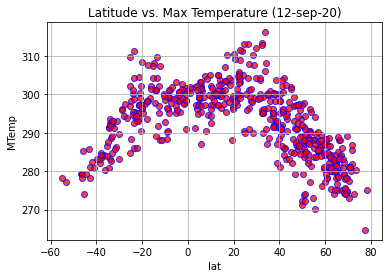

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a scatter plot of Latitude vs. Max Temperature
x=df2['lat']
y=df2['MTemp']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Max Temperature (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("MTemp")
plt.grid()

plt.show()
#Save the plotted figures as png
plt.savefig('Lat vs. Max Temp.png')

## Latitude vs. Humidity Plot

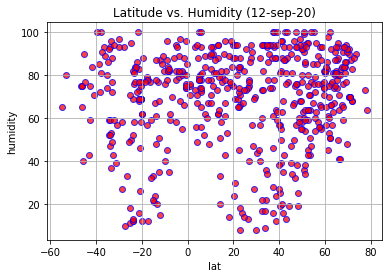

<Figure size 432x288 with 0 Axes>

In [14]:
x=df2['lat']
y=df2['humidity']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Humidity (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("humidity")
plt.grid()

plt.show()
#Save the plotted figures as png
plt.savefig('Lat vs. Humidity.png')

## Latitude vs. Cloudiness Plot

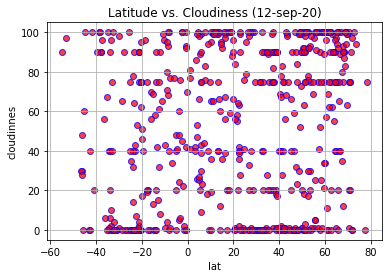

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a scatter plot of Latitude vs. Cloudiness
x=df2['lat']
y=df2['cloudinnes']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Cloudiness (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("cloudinnes")
plt.grid()

plt.show()

#Save the plotted figures as png
plt.savefig('Lat vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

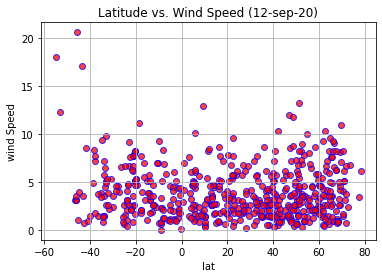

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a scatter plot of Latitude vs. Wind Speed
x=df2['lat']
y=df2['windspeed']

plt.scatter(x,y, alpha= 0.75, facecolors= "red", edgecolors="blue")
plt.title("Latitude vs. Wind Speed (12-sep-20)")
plt.xlabel("lat")
plt.ylabel("wind Speed")
plt.grid()

plt.show()

#Save the plotted figures as png
plt.savefig('Lat vs. Wind Speed.png')

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = df2[df2['lat']>0]
Northern_Hemisphere.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
0,Dankaur,IN,28.35,77.55,310.15,47,20,4.10,1600336910
1,Half Moon Bay,US,37.46,-122.43,292.04,100,90,2.10,1600336910
2,Talakan,RU,50.32,130.37,286.61,92,92,3.15,1600336912
3,Sakakah,SA,29.97,40.21,312.15,8,0,2.60,1600336913
4,Thompson,CA,55.74,-97.86,270.15,79,5,2.10,1600336913


In [19]:
Southern_Hemisphere = df2[df2['lat']<0]
Southern_Hemisphere.head()

,name,country,lat,lon,MTemp,humidity,cloudinnes,windspeed,date
5,Rikitea,PF,-23.12,-134.97,295.45,84,43,9.17,1600336915
7,Tuatapere,NZ,-46.13,167.68,279.26,75,30,3.13,1600336916
8,Ahipara,NZ,-35.17,173.17,286.52,80,67,3.89,1600336916
9,Hermanus,ZA,-34.42,19.23,291.48,59,0,0.89,1600336917
12,Bluff,NZ,-46.60,168.33,279.26,75,30,3.13,1600336918


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Max Temp vs. Latitude is -0.77


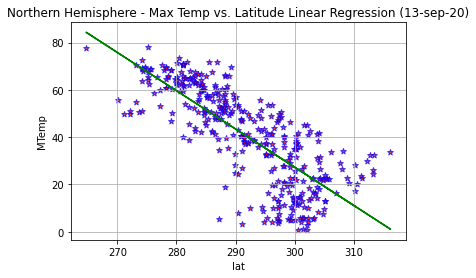

In [20]:

corr=round(sts.pearsonr(Northern_Hemisphere['MTemp'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Max Temp vs. Latitude is {corr}")
model = sts.linregress(Northern_Hemisphere['MTemp'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['MTemp']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['MTemp'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['MTemp'], y_values,color="green")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("MTemp")
plt.grid()

plt.show()

in the Northern Hemisphere the Temperature increce as the Latitude decrece

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Southern_Hemisphere - Max Temp vs. Latitude is 0.71


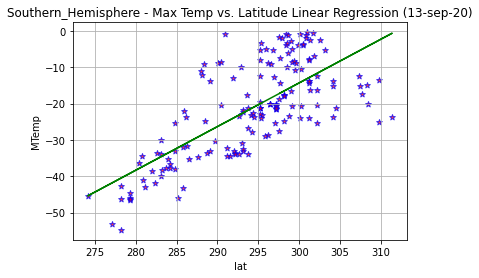

In [21]:
corr=round(sts.pearsonr(Southern_Hemisphere['MTemp'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern_Hemisphere - Max Temp vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['MTemp'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['MTemp']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['MTemp'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['MTemp'], y_values,color="green")
plt.title("Southern_Hemisphere - Max Temp vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("MTemp")
plt.grid()

plt.show()

in the Southern Hemisphere the Temperature increce as the Latitude increce

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Humidity (%) vs. Latitude is 0.06


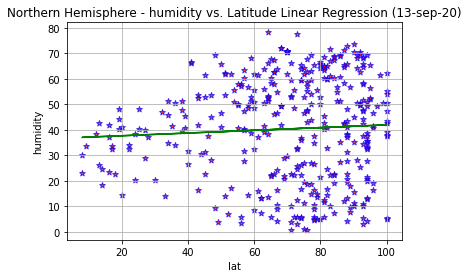

In [22]:
corr=round(sts.pearsonr(Northern_Hemisphere['humidity'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Humidity (%) vs. Latitude is {corr}")
model = sts.linregress(Northern_Hemisphere['humidity'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['humidity']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['humidity'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['humidity'], y_values,color="green")
plt.title("Northern Hemisphere - humidity vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("humidity")
plt.grid()

plt.show()

in the Northern Hemisphere, the humidity increce as the latitude increce. more than 55% of the humidity is concentrate betein 60 - 100 latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Southern Hemisphere - humidity vs. Latitude is 0.04


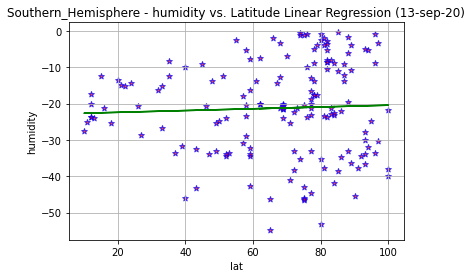

In [23]:
corr=round(sts.pearsonr(Southern_Hemisphere['humidity'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern Hemisphere - humidity vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['humidity'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['humidity']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['humidity'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['humidity'], y_values,color="green")
plt.title("Southern_Hemisphere - humidity vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("humidity")
plt.grid()

plt.show()


in the Southern Hemisphere the humidity increce as the latitude increce like the nourthen hemisphere.
the Southern Hemisphere present less humidity than the northen hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Cloudiness (%) vs. Latitude is 0.07


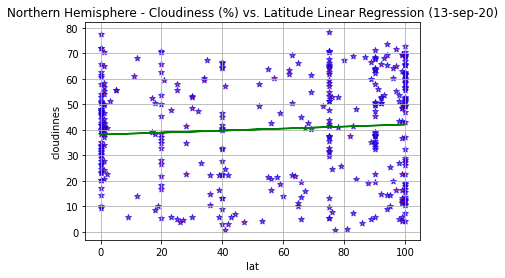

In [24]:
corr=round(sts.pearsonr(Northern_Hemisphere['cloudinnes'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Cloudiness (%) vs. Latitude is {corr}")
model = sts.linregress(Northern_Hemisphere['cloudinnes'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['cloudinnes']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['cloudinnes'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['cloudinnes'], y_values,color="green")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("cloudinnes")
plt.grid()

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Southern_Hemisphere - cloudinnes vs. Latitude is 0.01


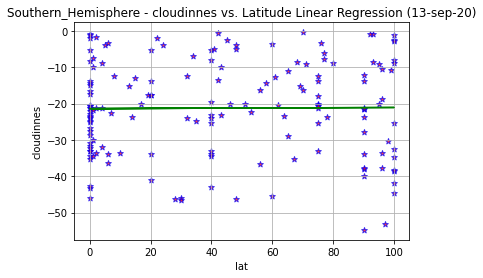

In [25]:
corr=round(sts.pearsonr(Southern_Hemisphere['cloudinnes'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern_Hemisphere - cloudinnes vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['cloudinnes'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['cloudinnes']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['cloudinnes'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['cloudinnes'], y_values,color="green")
plt.title("Southern_Hemisphere - cloudinnes vs. Latitude Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("cloudinnes")
plt.grid()

plt.show()

in the southern hemisphere cloudinnes is lest concentrate at latitude 60

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear is 0.08


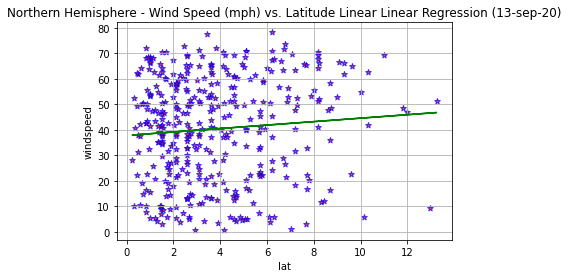

In [26]:
corr=round(sts.pearsonr(Northern_Hemisphere['windspeed'], Northern_Hemisphere['lat'])[0],2)
print(f"The correlation between Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear is {corr}")
model = sts.linregress(Northern_Hemisphere['windspeed'], Northern_Hemisphere['lat'])
y_values = Northern_Hemisphere['windspeed']*model[0]+model[1]

plt.scatter(Northern_Hemisphere['windspeed'],Northern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Northern_Hemisphere['windspeed'], y_values,color="green")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Linear Regression (13-sep-20)")

plt.xlabel("lat")
plt.ylabel("windspeed")
plt.grid()

plt.show()


in the Northern Hemisphere the wind speed decrese as latitude increce. the relationship betwin those variables are slightly is moderate.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Southern_Hemisphere - windspeed vs. Latitude is -0.31


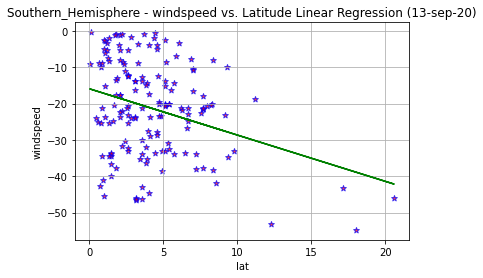

In [27]:
corr=round(sts.pearsonr(Southern_Hemisphere['windspeed'], Southern_Hemisphere['lat'])[0],2)
print(f"The correlation between Southern_Hemisphere - windspeed vs. Latitude is {corr}")
model = sts.linregress(Southern_Hemisphere['windspeed'], Southern_Hemisphere['lat'])
y_values = Southern_Hemisphere['windspeed']*model[0]+model[1]

plt.scatter(Southern_Hemisphere['windspeed'],Southern_Hemisphere['lat'], alpha= 0.75, facecolors= "red", edgecolors="blue", marker="*")
plt.plot(Southern_Hemisphere['windspeed'], y_values,color="green")
plt.title("Southern_Hemisphere - windspeed vs. Latitude Linear Regression (13-sep-20)")


plt.xlabel("lat")
plt.ylabel("windspeed")
plt.grid()


plt.show()
